# Structural reliability analysis

Notebook inspired by

http://www.math.chalmers.se/Stat/Grundutb/CTH/mve300/1112/files/Lecture10/Lecture10.pdf

Safety indexes:

  Cornell safety index
  Hasofer-Lind index

Concepts and examples

https://www.palisade.com/downloads/pdf/EngineeringReliabilityConcepts.pdf

Other reference

http://www.eurocodes.fi/1990/paasivu1990/sahkoinen1990/handbook2%5B1%5D.pdf

Main references

http://www.km.fgg.uni-lj.si/coste24/data/coimbradocuments/coimbra-faber.pdf

http://www.kstr.lth.se/fileadmin/kstr/pdf_files/STforsk_kurs-10/presentatione_rmm/reliability_analysis10__Kompatibilitetslaege_.pdf

http://web.mae.ufl.edu/nkim/eas6939/RBDO_Class.pdf

http://civile.utcb.ro/ccba/srracourse.pdf

In [1]:
% matplotlib inline

import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt

Basic reliability problem

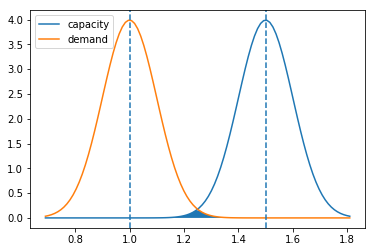

In [2]:
rv_cap = norm(loc=1.5, scale=0.1) # capacity
rv_dem = norm(loc=1.0, scale=0.1) # demand
x = np.linspace(rv_dem.ppf(0.001), rv_cap.ppf(0.999), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_cap.pdf(x), label='capacity')
ax.plot(x, rv_dem.pdf(x), label='demand')
ax.axvline(rv_cap.stats(moments='m'), ls='--')
ax.axvline(rv_dem.stats(moments='m'), ls='--')
ax.fill_between(x, 0, np.minimum(rv_cap.pdf(x),rv_dem.pdf(x)))
plt.legend(loc='upper left')
plt.show()

Failure probability computation

In [3]:
def f1(x):
    """Objective function for numerical quadrature."""
    return rv_dem.pdf(x)*rv_cap.cdf(x)

val, err = quad(f1, rv_dem.ppf(0.001), rv_cap.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

Value = 2.034760e-04, error = 1.759145e-09


In [4]:
def f2(x):
    """Objective function for numerical quadrature."""
    return (1-rv_dem.cdf(x))*rv_cap.pdf(x)

val, err = quad(f2, rv_dem.ppf(0.001), rv_cap.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

Value = 2.034760e-04, error = 1.759145e-09


Safety margin

http://www.km.fgg.uni-lj.si/coste24/data/coimbradocuments/coimbra-faber.pdf

See pages 47-48.

In [5]:
miu = rv_cap.mean()-rv_dem.mean()
sigma = np.sqrt(rv_cap.std()**2+rv_dem.std()**2)
print('miu = {:1.6e}, sigma = {:1.6e}'.format(miu, sigma))
beta = miu/sigma
print('beta = {:1.6}'.format(beta))
PF = norm.cdf(-beta) # probability of failure
print('Value = {:1.6e}'.format(PF))

miu = 5.000000e-01, sigma = 1.414214e-01
beta = 3.53553
Value = 2.034760e-04


Reliability index